<a href="https://colab.research.google.com/github/MrigankSingh10/Handwritten-Mnist-dataset-recognition/blob/master/Mnist_Digit_Exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip -q install tensorflow==2.1 grpcio google-auth

In [ ]:
print(tf.__version__)

2.1.0


In [ ]:
from tensorflow import keras

Loading the Data

In [ ]:
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
(train_images,trai_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
class_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [ ]:
class_names[trai_labels[4]]

'Nine'

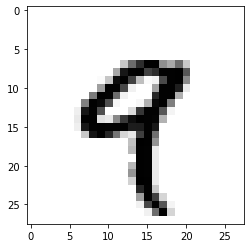

In [ ]:
plt.imshow(train_images[4],cmap=plt.cm.binary)

Normalize The Data

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

Creating A NN

In [ ]:
layers=[keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')]

In [ ]:
model=keras.Sequential(layers)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train The NN

In [ ]:
history=model.fit(train_images,trai_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2600 - accuracy: 0.9262
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1134 - accuracy: 0.9663
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0763 - accuracy: 0.9771
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0566 - accuracy: 0.9826
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0436 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0347 - accuracy: 0.9893
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0279 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0219 - accuracy: 0.9934
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
60

In [ ]:
history1=test_loss,test_acc=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0764 - accuracy: 0.9793


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

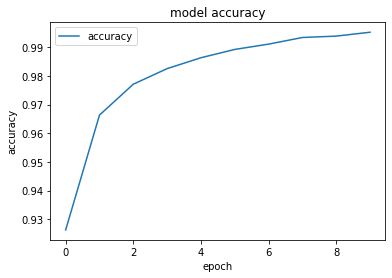

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

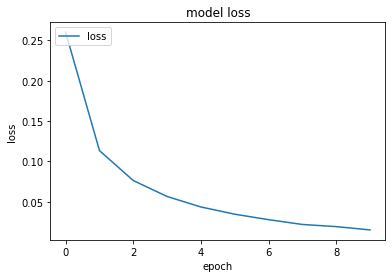

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss'],loc='upper left')
plt.show()

In [ ]:
model.save("ciphar10")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ciphar10/assets


In [ ]:
predictions=model.predict(test_images)

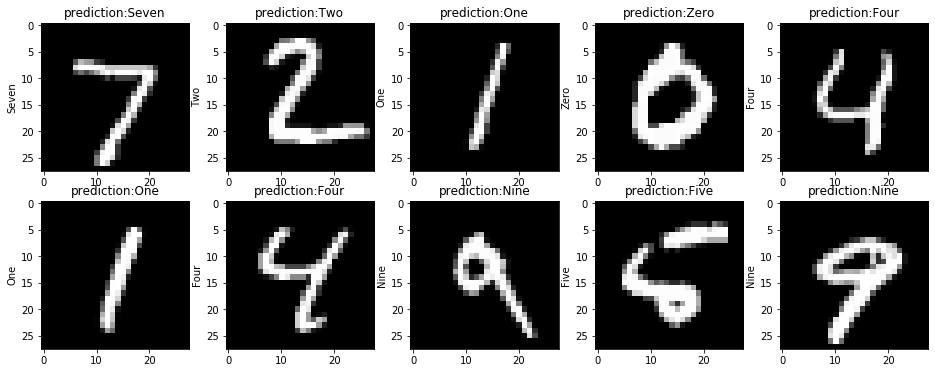

In [ ]:
plt.figure(figsize=(16,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  
  plt.imshow(test_images[i],cmap='gray')
  plt.ylabel(class_names[test_labels[i]])
  plt.title("prediction:"+class_names[np.argmax(predictions[i])])
  
  

In [ ]:
class_names[test_labels[0]]

'Seven'